The data source that analyzed in this report provides information on 17 key sustainability themes spanning environmental, social, and governance categories. The data spans from 1960 to 2021 and can be found at this link https://datacatalog.worldbank.org/search/dataset/0037651/Environment--Social-and-Governance-Data.

Questions:

Does the data show any correlation between GDP, fertility rate, and fossil fuel consumption world wide?

life expectancy in high income countries vs low income countries and if that has a relationship with population density?

Which country publishes the most Scientific and technical journal articles and does this trend with School enrollment, primary and secondary (gross), gender parity index (GPI).




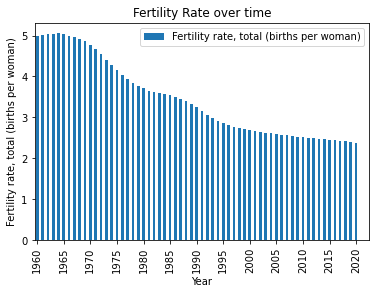

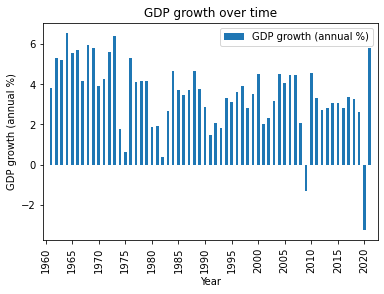

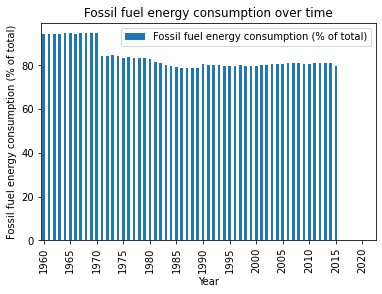

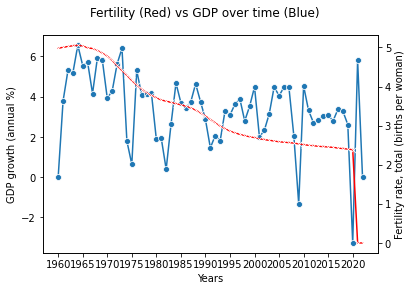

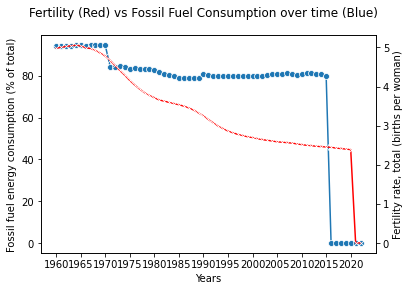

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
'''
Loading of data and cleaning to approach the first question.
'''
data = pd.read_csv("ESGData.csv", index_col=0)
data.dropna()
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
new_frame = data.groupby(["Country Name", "Indicator Name"]).sum().reset_index()
new_frame = new_frame.dropna()
years = new_frame.columns[2:].tolist()

'''
Fertility Rate over time
'''
world_frame = new_frame.loc[new_frame['Country Name'] == 'World']
fertility_list = world_frame.loc[world_frame["Indicator Name"] == "Fertility rate, total (births per woman)"].values.flatten().tolist()[2:]
gdp_list = world_frame.loc[world_frame['Indicator Name'] == 'GDP growth (annual %)'].values.flatten().tolist()[2:]
fossil_fuel_list = world_frame.loc[world_frame['Indicator Name'] == 'Fossil fuel energy consumption (% of total)'].values.flatten().tolist()[2:]
qone_frame = pd.DataFrame({'Years': years, 'Fertility rate, total (births per woman)': fertility_list, 'GDP growth (annual %)':gdp_list, 'Fossil fuel energy consumption (% of total)':fossil_fuel_list})
qone_frame.plot(x="Years", y="Fertility rate, total (births per woman)", kind="bar")
plt.title('Fertility Rate over time')
plt.xlabel('Year')
plt.ylabel('Fertility rate, total (births per woman)')
plt.xticks(np.arange(0, len(x)+1, 5))
plt.show()

'''
gdp over time
'''
qone_frame.plot(x="Years", y="GDP growth (annual %)", kind="bar")
plt.title('GDP growth over time')
plt.xlabel('Year')
plt.ylabel('GDP growth (annual %)')
plt.xticks(np.arange(0, len(x)+1, 5))
plt.show()

'''
Fossil Fuel Consumption over time
'''
qone_frame.plot(x="Years", y="Fossil fuel energy consumption (% of total)", kind="bar")
plt.title('Fossil fuel energy consumption over time')
plt.xlabel('Year')
plt.ylabel('Fossil fuel energy consumption (% of total)')
plt.xticks(np.arange(0, len(x)+1, 5))
plt.show()

'''
Combined plots.
'''
fig, ax = plt.subplots(sharex = True)
fig.suptitle('Fertility (Red) vs GDP over time (Blue)')
sns.lineplot(x="Years", y="GDP growth (annual %)", data=qone_frame, ax=ax, marker='o', sort = False);
ax2 = ax.twinx()
sns.lineplot(x = ax.get_xticks(), y=qone_frame['Fertility rate, total (births per woman)'], marker='x', color='red', sort = False, ax=ax2)
ax.set_xticks(np.arange(0, len(x)+1, 5))
ax.sharex(ax2)

fig, ax = plt.subplots(sharex = True)
fig.suptitle('Fertility (Red) vs Fossil Fuel Consumption over time (Blue)')
sns.lineplot(x="Years", y="Fossil fuel energy consumption (% of total)", data=qone_frame, ax=ax, marker='o', sort = False);
ax2 = ax.twinx()
sns.lineplot(x = ax.get_xticks(), y=qone_frame['Fertility rate, total (births per woman)'], marker='x', color='red', sort = False, ax=ax2)
ax.set_xticks(np.arange(0, len(x)+1, 5))
ax.sharex(ax2)



In considering the data its clear that the world wide scope in terms of GDP is too wide and unpredictable to be valuable in considering correlation with the other 2 variables. Each feature on its own has generally negative trend, Fertility rate has the clearest and cleanest trend almost decreasing in a linear fashion over the years. GDP is incredibly unpredictable spiking harshly and dropping harshly over the years, more than likely this is due to the world wide scope where economics per country are subjective making GDP unreliable on the world wide scale. If we narrowed the data to a specific country or region like North America the results may be more worthwhile in terms of considering the impact of GDP. Fossil Fuel consumption also has a clear negative trend over the years although it decreases at a much slower pace than fertility rate. When considering the combined plots we can say that generally fertility rate falls over time not significantly impacted by either GDP growth or Fossil Fuel consumption though we can see that upticks in fertility rate do trend with more stability in GDP growth. Looking at the 1980's we can see GDP growth being relatively stable between 3% and 5% coinciding with a slight uptick in fertility rate, this trend is also preset in the late 60's early 70's. With further analysis and a more narrow scope it may be possible to find a trend between fertility rates and GDP. The situation is similar with fossil fuel consumption, with increasing public awareness of climate change we expect fossil fuel consumption to steadily decrease and it does, since fertility is also decreasing one could correlate the two but the data isnt convincing enough to state that they impact one another. 

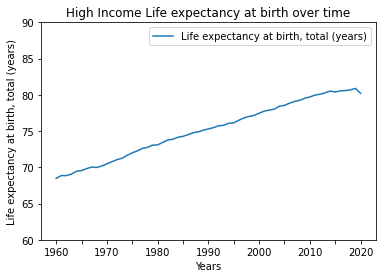

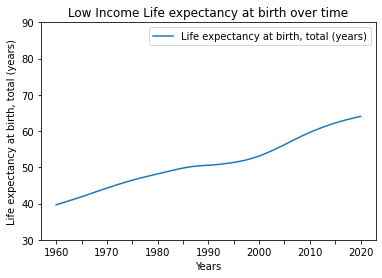

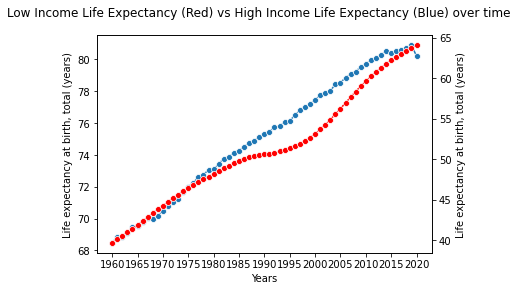

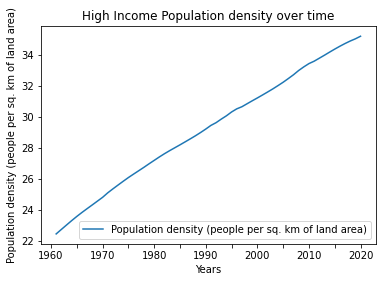

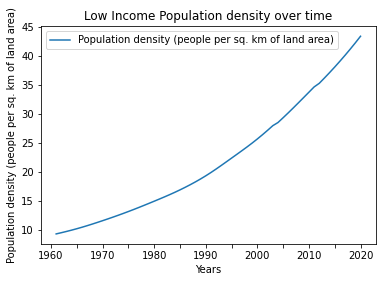

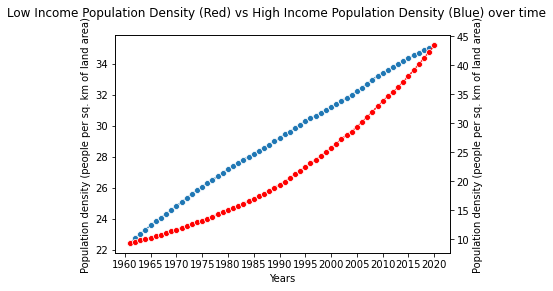

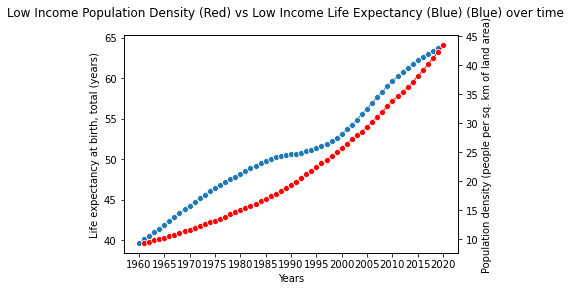

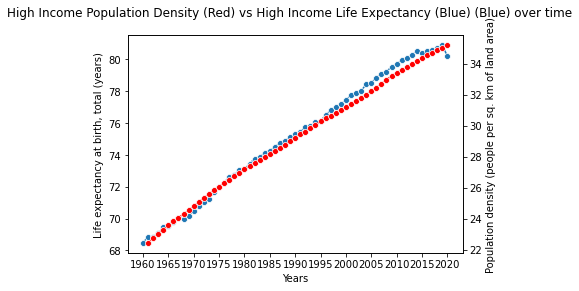

In [391]:
'''
Question 2:
life expectancy in high income countries vs low income countries and if that has a relationship with population density

Setup and cleaning
'''

high_income_frame = new_frame.loc[new_frame['Country Name'] == 'High income']
years = new_frame.columns[2:].tolist()
high_income_expectancy = high_income_frame.loc[high_income_frame["Indicator Name"] == "Life expectancy at birth, total (years)"].values.flatten().tolist()[2:]
high_income_population = high_income_frame.loc[high_income_frame["Indicator Name"] == "Population density (people per sq. km of land area)"].values.flatten().tolist()[2:]
qtwo_high_frame = pd.DataFrame({'Years': years, "Life expectancy at birth, total (years)": high_income_expectancy, "Population density (people per sq. km of land area)":high_income_population})

low_income_frame = new_frame.loc[new_frame['Country Name'] == 'Low income']
years = new_frame.columns[2:].tolist()
low_income_expectancy = low_income_frame.loc[low_income_frame["Indicator Name"] == "Life expectancy at birth, total (years)"].values.flatten().tolist()[2:]
low_income_population = low_income_frame.loc[low_income_frame["Indicator Name"] == "Population density (people per sq. km of land area)"].values.flatten().tolist()[2:]
qtwo_low_frame = pd.DataFrame({'Years': years, "Life expectancy at birth, total (years)": low_income_expectancy, "Population density (people per sq. km of land area)":low_income_population})

high_cleaned = qtwo_high_frame.dropna()
qtwo_high_frame.plot(x="Years", y="Life expectancy at birth, total (years)", kind="line")
plt.title('High Income Life expectancy at birth over time')
plt.xlabel('Years')
plt.ylim(60, 90)
plt.ylabel('Life expectancy at birth, total (years)')
plt.xticks(np.arange(0, len(x)+1, 5))
plt.show()

low_cleaned = qtwo_low_frame.dropna()
qtwo_low_frame.plot(x="Years", y="Life expectancy at birth, total (years)", kind="line")
plt.title('Low Income Life expectancy at birth over time')
plt.xlabel('Years')
plt.ylim(30, 90)
plt.ylabel('Life expectancy at birth, total (years)')
plt.xticks(np.arange(0, len(x)+1, 5))
plt.show()

fig, ax = plt.subplots(sharex = True)
fig.suptitle('Low Income Life Expectancy (Red) vs High Income Life Expectancy (Blue) over time')
sns.lineplot(x="Years", y="Life expectancy at birth, total (years)", data=qtwo_high_frame, ax=ax, marker='o', ci=None);
ax2 = ax.twinx()
sns.lineplot(x = ax.get_xticks(), y="Life expectancy at birth, total (years)", data = qtwo_low_frame, marker='o', color = "red", ax=ax2)
ax.set_xticks(np.arange(0, len(x)+1, 5))
ax.sharex(ax2)

qtwo_high_frame.plot(x="Years", y="Population density (people per sq. km of land area)", kind="line")
plt.title('High Income Population density over time')
plt.xlabel('Years')
plt.ylabel('Population density (people per sq. km of land area)')
plt.xticks(np.arange(0, len(x)+1, 5))
plt.show()


qtwo_low_frame.plot(x="Years", y="Population density (people per sq. km of land area)", kind="line")
plt.title('Low Income Population density over time')
plt.xlabel('Years')
plt.ylabel('Population density (people per sq. km of land area)')
plt.xticks(np.arange(0, len(x)+1, 5))
plt.show()


fig, ax = plt.subplots(sharex = True)
fig.suptitle('Low Income Population Density (Red) vs High Income Population Density (Blue) over time')
sns.lineplot(x="Years", y="Population density (people per sq. km of land area)", data=qtwo_high_frame, ax=ax, marker='o', ci=None);
ax2 = ax.twinx()
sns.lineplot(x = ax.get_xticks(), y="Population density (people per sq. km of land area)", data = qtwo_low_frame, marker='o', color = "red", ax=ax2)
ax.set_xticks(np.arange(0, len(x)+1, 5))
ax.sharex(ax2)

fig, ax = plt.subplots(sharex = True)
fig.suptitle('Low Income Population Density (Red) vs Low Income Life Expectancy (Blue) (Blue) over time')
sns.lineplot(x="Years", y="Life expectancy at birth, total (years)", data=qtwo_low_frame, ax=ax, marker='o', ci=None);
ax2 = ax.twinx()
sns.lineplot(x = ax.get_xticks(), y="Population density (people per sq. km of land area)", data = qtwo_low_frame, marker='o', color = "red", ax=ax2)
ax.set_xticks(np.arange(0, len(x)+1, 5))
ax.sharex(ax2)

fig, ax = plt.subplots(sharex = True)
fig.suptitle('High Income Population Density (Red) vs High Income Life Expectancy (Blue) (Blue) over time')
sns.lineplot(x="Years", y="Life expectancy at birth, total (years)", data=qtwo_high_frame, ax=ax, marker='o', ci=None);
ax2 = ax.twinx()
sns.lineplot(x = ax.get_xticks(), y="Population density (people per sq. km of land area)", data = qtwo_high_frame, marker='o', color = "red", ax=ax2)
ax.set_xticks(np.arange(0, len(x)+1, 5))
ax.sharex(ax2)


Looking at the results, the trends are positive for each graph. For high income and low income countries life expectancy and population density have trended in a positive direction, at different rates but still increasing over time. It could be said from the results that as population density increases life expectancy also increases. Since technology advances with time as well the increase in life expectancy can probably be attributed to advancements in science and access to care. If one were to relate it specifically to population density, it could be that increases in population skew the probabilities and people dying earlier dont effect the overall statistic as much due to the high amount of people living. When comparing high income to low income one can see that high income life expectancy grows faster, starts higher, and ends higher than low income life expectancy. This is also more than likely due to greater access of care in wealthier countries. Population density compared between low income and high income countries is particularly interesting. While they both trend positively high income population density grows at a much slower rate than low income. Low income both starts lower and ends higher than high income. This more than likely has to do with the fact the lower income countries are seeing a boom in development where wealthier countries have already experienced a similar boom prior to the dates measured in this data (which is why they're catagorized as wealthy.) While its simple to explain the rapid increase in low income population denisty is surprising.


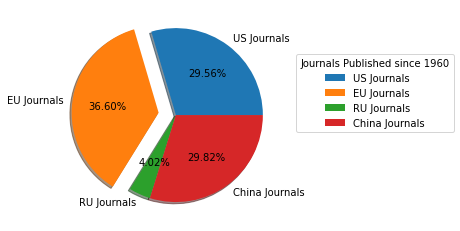

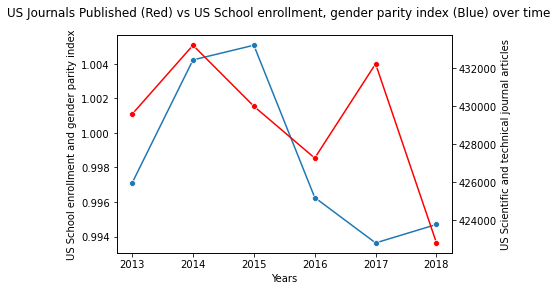

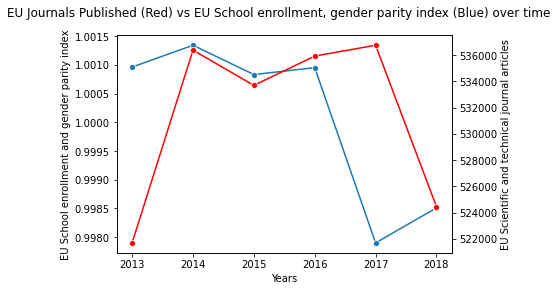

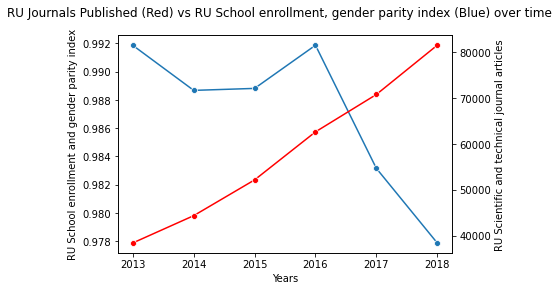

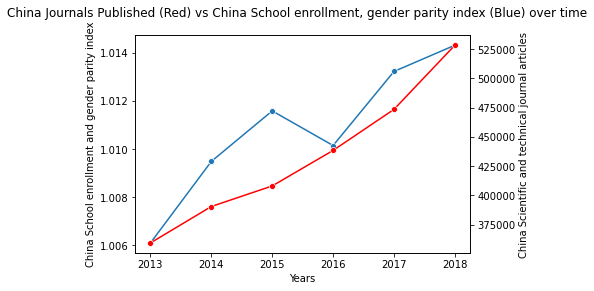

In [420]:
'''
Which country has published the most scientific journals between the EU, Russian Federation, China, and the United States and 
does this trend with School enrollment, primary and secondary (gross), gender parity index (GPI).
'''

us_frame = new_frame.loc[new_frame['Country Name'] == 'United States']
eu_frame = new_frame.loc[new_frame['Country Name'] == 'European Union']
ru_frame = new_frame.loc[new_frame['Country Name'] == 'Russian Federation']
ch_frame = new_frame.loc[new_frame['Country Name'] == 'China']

us_scientific_list = us_frame.loc[us_frame["Indicator Name"] == "Scientific and technical journal articles"].values.flatten().tolist()[2:]
eu_scientific_list = eu_frame.loc[eu_frame["Indicator Name"] == "Scientific and technical journal articles"].values.flatten().tolist()[2:]
ru_scientific_list = ru_frame.loc[ru_frame["Indicator Name"] == "Scientific and technical journal articles"].values.flatten().tolist()[2:]
ch_scientific_list = ch_frame.loc[ch_frame["Indicator Name"] == "Scientific and technical journal articles"].values.flatten().tolist()[2:]

us_school_list = us_frame.loc[us_frame["Indicator Name"] == "School enrollment, primary and secondary (gross), gender parity index (GPI)"].values.flatten().tolist()[2:]
eu_school_list = eu_frame.loc[eu_frame["Indicator Name"] == "School enrollment, primary and secondary (gross), gender parity index (GPI)"].values.flatten().tolist()[2:]
ru_school_list = ru_frame.loc[ru_frame["Indicator Name"] == "School enrollment, primary and secondary (gross), gender parity index (GPI)"].values.flatten().tolist()[2:]
ch_school_list = ch_frame.loc[ch_frame["Indicator Name"] == "School enrollment, primary and secondary (gross), gender parity index (GPI)"].values.flatten().tolist()[2:]

qthree_frame = pd.DataFrame({'Years': years, 'US Scientific and technical journal articles': us_scientific_list, 'EU Scientific and technical journal articles': eu_scientific_list,
                            'RU Scientific and technical journal articles': ru_scientific_list,'China Scientific and technical journal articles': ch_scientific_list,
                             "US School enrollment and gender parity index":us_school_list,
                             "EU School enrollment and gender parity index":eu_school_list,
                             "RU School enrollment and gender parity index":ru_school_list,
                             "China School enrollment and gender parity index":ch_school_list,} )
qthree_frame_dropped = qthree_frame.dropna()
Us_Total = qthree_frame_dropped['US Scientific and technical journal articles'].sum()
EU_total = qthree_frame_dropped['EU Scientific and technical journal articles'].sum()
RU_Total = qthree_frame_dropped['RU Scientific and technical journal articles'].sum()
CH_Total = qthree_frame_dropped['China Scientific and technical journal articles'].sum()
totals = np.array([Us_Total, EU_total, RU_Total, CH_Total])
journal_labels = ["US Journals", "EU Journals", "RU Journals", "China Journals"]
myexplode = [0, 0.2, 0, 0]
plt.pie(totals, labels = journal_labels, explode = myexplode,autopct = '%.2f%%',shadow = True)
plt.legend(title="Journals Published since 1960",
          loc="center right",
          bbox_to_anchor=(1.0, 0, .8, 1.2))
plt.show() 


fig, ax = plt.subplots(sharex = True)
fig.suptitle('US Journals Published (Red) vs US School enrollment, gender parity index (Blue) over time')
sns.lineplot(x="Years", y='US School enrollment and gender parity index', data=qthree_frame_dropped, ax=ax, marker='o', ci=None);
ax2 = ax.twinx()
sns.lineplot(x = ax.get_xticks(), y='US Scientific and technical journal articles', data = qthree_frame_dropped, marker='o', color = "red", ax=ax2)
ax.sharex(ax2)

fig, ax = plt.subplots(sharex = True)
fig.suptitle('EU Journals Published (Red) vs EU School enrollment, gender parity index (Blue) over time')
sns.lineplot(x="Years", y='EU School enrollment and gender parity index', data=qthree_frame_dropped, ax=ax, marker='o', ci=None);
ax2 = ax.twinx()
sns.lineplot(x = ax.get_xticks(), y='EU Scientific and technical journal articles', data = qthree_frame_dropped, marker='o', color = "red", ax=ax2)
ax.sharex(ax2)

fig, ax = plt.subplots(sharex = True)
fig.suptitle('RU Journals Published (Red) vs RU School enrollment, gender parity index (Blue) over time')
sns.lineplot(x="Years", y='RU School enrollment and gender parity index', data=qthree_frame_dropped, ax=ax, marker='o', ci=None);
ax2 = ax.twinx()
sns.lineplot(x = ax.get_xticks(), y='RU Scientific and technical journal articles', data = qthree_frame_dropped, marker='o', color = "red", ax=ax2)
ax.sharex(ax2)

fig, ax = plt.subplots(sharex = True)
fig.suptitle('China Journals Published (Red) vs China School enrollment, gender parity index (Blue) over time')
sns.lineplot(x="Years", y='China School enrollment and gender parity index', data=qthree_frame_dropped, ax=ax, marker='o', ci=None);
ax2 = ax.twinx()
sns.lineplot(x = ax.get_xticks(), y='China Scientific and technical journal articles', data = qthree_frame_dropped, marker='o', color = "red", ax=ax2)
ax.sharex(ax2)

Considering the results, the EU has published the most journals since 1960 accounting for 36.60% of the total between the four nations. The Russian federation surprisingly has the least which may be due to the fall of the soviet union etc. Looking at the comparison charts of school enrollment and GPI vs journas published, the Russian Federation, EU, and US all have school enrollment GPI that trends downward meaning that theres an increasing imbalance between the amount of girls and boys attending primary and secondary schools in those nations. In China theres a positive trend, signifying that the ratio of girls to boys is increasing indicating more girls enrolling in primary and secondary schools in China. China is also the only nation where there seems to be a correlation between published journals and school enrollment GPI. They both trend in a positive direction indicating that as school enrollment gpi increases the number of published journals also increase. In the US and EU the correlation can be made that as gpi decreases so does the amount of journals being published. Russia is the outlier here showing the opposite that published journals increases despite the trend of gpi. 

Summary:
    
In completing this project I have found the data explored in question one has too broad of scope to really determine relationships. GDP isnt a good measure to use on a worldwide scale since economics is subjective to nation. There is a clear correlation between decreasing fossil fuel consumption and fertility though. The analysis falls short of determining reasoning behind the correlation but with further research and a more compact scope the realtionship could be more adequately explored.

For question 2 I found that population density and life expectancy both trend positively over time in high income and low income nations. The rate of growth in both for low income nations is higher than that of high income nations which can be attributed to an increase in societal development for low income nations that high income nations have already gone through. It can also be seen that high income nations start with higher life expectancy and end with higher life expectancy which can be attributed to wide spread access of healthcare in welathier nations. Theres more data that could be considered in these relationships like access to technology, clean water etc, but that would require more time than the project allows. 

Question 3 considers School enrollment gender parity index (the ratio of girls to boys enrolled in public and private schools) to the amount of scientific journals published. The European Union published the majority of the journals over the period of time while the RU published the least by a significant margin. When compared to the GPI it can be deduced that as GPI increases so does the number of journals being published and as GPI decreases so does the number of journals being published. Russia is the outlier here showing the converse relationship of GPI decreasing and journals published increasing steadily.

The biggest hurdle with this data is the format that it started in having the columns headers as years wasnt conducive to the questions I wanted to answer and took a significant amount of transforming. Further due to the way country name was structured it was difficult to aggregate certain types of data causing me to have change my initial questions to varying degrees. The format of the data also limited my options for graphs. I think for question 1 the scope was to wide to produce meaningful results. Im not sure I would continue working with the same data set without changing its format or I would switch to by year comparisons. What I would like is to explore similar topics on a smaller scale where Im only considering one nation and its more granular per that nation. 
